In [1]:
import torch

import torch.nn as nn

#from nvae.utils import add_sn
#from nvae.vae_celeba import NVAE
import numpy as np
import matplotlib.pyplot as plt
#from nvae.utils import reparameterize
from torchvision import datasets, transforms


import os


In [2]:
device = ("cuda:0" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

from vae import VAE_big

model = VAE_big(device, image_channels=3).to(device)

train_data_size = 162079
epochs = 199
beta_value = 5.0

# For Beta VAE with Beta  = 5.0 min and maximum damaged images

## Your VAE specific min and max segments

In [3]:


prev_div_min = 100.0
prev_div_max = 0.0
all_losses = []

segment = 9

all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
feature = all_features[3]
all_source_images = torch.tensor([]).to(device)
all_source_images_attacked = torch.tensor([]).to(device)

for feature in all_features:
    for segment in range(60):
        desired_norm_l_inf = 0.094

        #all_features = ["bald", "beard", "oldfemaleGlass", "hat"]#, "generalWhiteWomen", "blackWomen"]

        universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]



        source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 
        all_source_images = torch.cat((all_source_images, source_im), dim=0)


        if(beta_value == 5.0 or beta_value == 10.0): 
            model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
            optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"beta"+str(beta_value)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
        else:
            model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
            optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
        model.eval()


        image_height, image_width, _ = source_im[0].cpu().detach().permute(1, 2, 0).cpu().numpy().shape
        aspect_ratio = image_width / image_height

        corresponding_class_polulations = [1819, 24707, 145, 2827]
        #inside_feature_name = inside_feature_names[3]



        actualOutput, _, _ = model(source_im)
        ActualReconLoss = torch.sqrt((actualOutput - source_im)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


        DivAttackeImage = source_im + optimized_noise
        NormalDivAttackeImage = (DivAttackeImage - DivAttackeImage.min())/(DivAttackeImage.max() - DivAttackeImage.min())
        
        all_source_images_attacked = torch.cat((all_source_images_attacked, NormalDivAttackeImage), dim=0)

        DivOutput,_,_ = model(NormalDivAttackeImage)
        DivOutputL2ActualOutput = torch.sqrt((DivOutput - actualOutput)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()

        all_losses.append(DivOutputL2ActualOutput.item())

all_losses

[0.07612808048725128,
 0.07990994304418564,
 0.07008372247219086,
 0.06966231763362885,
 0.054534539580345154,
 0.060337357223033905,
 0.06909935921430588,
 0.06399334222078323,
 0.04779767990112305,
 0.06297039985656738,
 0.18397611379623413,
 0.0685843825340271,
 0.10806341469287872,
 0.05675796791911125,
 0.09610407799482346,
 0.06570052355527878,
 0.07680970430374146,
 0.051497213542461395,
 0.10152029991149902,
 0.07422931492328644,
 0.0672028586268425,
 0.06535758078098297,
 0.09205751121044159,
 0.07483243942260742,
 0.06363373249769211,
 0.0670022964477539,
 0.06550732254981995,
 0.08854261040687561,
 0.08425556123256683,
 0.12853960692882538,
 0.05308574438095093,
 0.07474488019943237,
 0.06724972277879715,
 0.10537360608577728,
 0.05966664105653763,
 0.05972341448068619,
 0.07186583429574966,
 0.07110126316547394,
 0.11311756074428558,
 0.0960385650396347,
 0.08116501569747925,
 0.05704314261674881,
 0.05898822098970413,
 0.065431147813797,
 0.06333620846271515,
 0.0590530335

In [4]:
all_source_images_attacked.shape, all_source_images.shape

(torch.Size([240, 3, 64, 64]), torch.Size([240, 3, 64, 64]))

In [5]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d/men_disjoined'
all_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d'
all_men_list = os.listdir(all_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all men List: ", len(all_men_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d/women_disjoined'
all_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d'
all_women_list = os.listdir(all_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all women List: ", len(all_women_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_young_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d/young_disjoined'
all_young_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d'
all_young_list = os.listdir(all_young_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all young List: ", len(all_young_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_old_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d/old_disjoined'
all_old_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d'
all_old_list = os.listdir(all_old_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all old List: ", len(all_old_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined'
young_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d'
young_men_list = os.listdir(young_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young men List: ", len(young_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined'
old_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d'
old_men_list = os.listdir(old_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old men List: ", len(old_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined'
old_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d'
old_women_list = os.listdir(old_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old women List: ", len(old_women_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined'
young_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d'
young_women_list = os.listdir(young_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young women List: ", len(young_women_list))


all men List:  84434
all women List:  118165
all young List:  156734
all old List:  45865
young men List:  53447
old men List:  7003
old women List:  1116
young women List:  103287


# Autoencode and TSNE  to get them uin 2d

## Embed source images

In [6]:
model.eval()
with torch.no_grad():
    ae_perturbed_embeds = model.encoder(all_source_images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
    mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
    std1 = logvar1.mul(0.5).exp_()
    esp1 = torch.randn(*mu1.size()).to(device)
    sources_z1 = mu1 + std1 * esp1
print("sources_z1.shape", sources_z1.shape)


sources_z1.shape torch.Size([240, 256])


## Embed_attacked images

In [7]:
model.eval()
with torch.no_grad():
    ae_perturbed_embeds = model.encoder(all_source_images_attacked) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
    mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
    std1 = logvar1.mul(0.5).exp_()
    esp1 = torch.randn(*mu1.size()).to(device)
    attackeded_z1 = mu1 + std1 * esp1
print("attackeded_z1.shape", attackeded_z1.shape)


attackeded_z1.shape torch.Size([240, 256])


# Embed sample images from different groups

In [8]:
parent_addresses = [all_men_parent, all_women_parent, all_young_parent, all_old_parent, young_men_parent, old_men_parent, young_women_parent, old_women_parent]
considered_lists = [all_men_list, all_women_list, all_young_list, all_old_list, young_men_list, old_men_list, young_women_list, old_women_list]

In [9]:
all_latent_groups_merged = torch.tensor([]).to(device)
populations = []
big_groups_list = []
for ind in range(4, 8):
    print("ind: ", ind)
    transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
            ])

    batch_size = 100000

    print("parent_addresses[ind]: ", parent_addresses[ind])

    celeba_data = datasets.ImageFolder(parent_addresses[ind], transform=transform)
    print("celeba_data: ", len(celeba_data))
    considered_list = considered_lists[ind]

    print("considered_list: ", len(considered_list))

    train_set, test_set = torch.utils.data.random_split(celeba_data, [int(len(considered_list) * 1.0), len(considered_list) - int(len(considered_list) * 1.0)])
    train_data_size = len(train_set)
    test_data_size = len(test_set)

    trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)


    for idx, (image, label) in enumerate(trainLoader):
        images, label = image.to(device), label.to(device)
        break

    populations.append(images.shape[0])
    big_groups_list.append(images)
    model.eval()
    with torch.no_grad():
        ae_perturbed_embeds = model.encoder(images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
        mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
        std1 = logvar1.mul(0.5).exp_()
        esp1 = torch.randn(*mu1.size()).to(device)
        z1 = mu1 + std1 * esp1
    print("z1.shape", z1.shape)
    all_latent_groups_merged = torch.cat((all_latent_groups_merged, z1), 0)
    print("all_latent_groups_merged.shape", all_latent_groups_merged.shape)


ind:  4
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d
celeba_data:  53447
considered_list:  53447
z1.shape torch.Size([53447, 256])
all_latent_groups_merged.shape torch.Size([53447, 256])
ind:  5
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d
celeba_data:  7003
considered_list:  7003
z1.shape torch.Size([7003, 256])
all_latent_groups_merged.shape torch.Size([60450, 256])
ind:  6
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d
celeba_data:  103287
considered_list:  103287
z1.shape torch.Size([100000, 256])
all_latent_groups_merged.shape torch.Size([160450, 256])
ind:  7
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d
celeba_data:  1116
considered_list:  1116
z1.shape torch.Size([1116, 256])
all_latent_groups_merged.shape torch.S

In [10]:
populations

[53447, 7003, 100000, 1116]

In [11]:
len(big_groups_list), big_groups_list[0].shape, big_groups_list[1].shape, big_groups_list[2].shape, big_groups_list[3].shape

(4,
 torch.Size([53447, 3, 64, 64]),
 torch.Size([7003, 3, 64, 64]),
 torch.Size([100000, 3, 64, 64]),
 torch.Size([1116, 3, 64, 64]))

In [12]:
all_latent_groups_merged = torch.cat((all_latent_groups_merged, sources_z1, attackeded_z1), 0)


In [13]:
all_latent_groups_merged.shape

torch.Size([162046, 256])

In [14]:
import torch
import numpy as np
from openTSNE import TSNE
from openTSNE.affinity import PerplexityBasedNN

# Check if a GPU is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Assuming your data is a torch tensor of size [63325, 256]
#data = torch.randn(63325, 256)  # Example tensor
data = all_latent_groups_merged.to(device)

# Convert the tensor to a NumPy array
data_np = data.cpu().numpy()

# Perform t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    metric="cosine",
    n_jobs=-1,
    random_state=42,
    negative_gradient_method="fft"  # Use FFT-based gradient calculation for speed
)

# Fit and transform the data
embedding = tsne.fit(data_np)

# Convert the result back to a torch tensor
data_tsne_tensor = torch.tensor(embedding, device=device)

# Check the size of the reduced tensor
print(data_tsne_tensor.shape)  # Should print torch.Size([63325, 2])


torch.Size([162046, 2])


In [15]:
data_tsne_tensor = data_tsne_tensor.cpu().numpy()   

# Here look at the losses and decide and which point you want to examine from which group

In [16]:
len(all_losses)

# sort the losses in descending order and get the indices
sorted_losses = np.argsort(all_losses)[::-1]
print("sorted_losses", sorted_losses)
print("all_losses[sorted_losses]", np.array(all_losses)[sorted_losses])


sorted_losses [ 10 209 139 187 144  85 238  65  29 186 192  66  93 219 184 165 226 191
 230  38  91 119  94 146  12 232 122  33 166 160 126 189  18 211 215  14
  39  78  99 212  88 151  69 217  56  64 129 108  22 235 178  27 234 201
 137 153  87 157 172  28 208  53 152  59 117 204 239 171 155 176 140  40
  98   1 227  80 220  95 158 200 214 109  16 199   0  58 236 115 194 206
 205  48  23  31 123 195  19  76 196  62 175  77 142 143 174  55 135 156
  81  61 177 202  36  86 113  74  37 121  72  50 237   2 173 207 125 118
   3 218 183 116   6 170  75 103 112 159  11 216 148 100 210 132  79  32
 138  20  90  25 231 127  15  26 198  43  21 124  96 223 133 180 197 229
   7  97 154  24 190 222  44   9 104  63 147 188  67 150  54  46  84  70
 233 131  92 145  89 164  57   5 161  73 107 182  35  34 120 228  51  45
 162  42 136  83  68  60  49 221 110  41  13 105 149 179 167 106   4 163
 128  71  30 114 141  17 130 193 213 181 169  82 185 224   8  47 134 225
 203 101 111 168  52 102]
all_losses[

In [182]:
all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]

selected_group_index = 1
sel_pt_in_the_group = 46

sel_pt = selected_group_index* 60 + sel_pt_in_the_group


In [183]:
sel_pt

106

# Pulling tendencies

In [184]:
young_men_2d = data_tsne_tensor[0:populations[0]]
old_men_2d = data_tsne_tensor[populations[0]:populations[0]+populations[1]]
young_women_2d = data_tsne_tensor[populations[0]+populations[1]:populations[0]+populations[1]+populations[2]]
old_women_2d = data_tsne_tensor[populations[0]+populations[1]+populations[2]:populations[0]+populations[1]+populations[2]+populations[3]]

before_attack_2d_embed = data_tsne_tensor[populations[0]+populations[1]+populations[2]+populations[3]+sel_pt].reshape(1, 2)
attacked_2d_embed = data_tsne_tensor[populations[0]+populations[1]+populations[2]+populations[3]+240+sel_pt].reshape(1, 2)


In [185]:
populations[0]+populations[1]+populations[2]+populations[3]+240+sel_pt

161912

In [186]:
young_men_2d.shape, attacked_2d_embed.shape

((53447, 2), (1, 2))

In [187]:

def get_l2_nearest_neighbours(young_men_2d, attacked_2d_embed):
    diff_squares = (young_men_2d - attacked_2d_embed)**2
    sum_diff_squares = diff_squares[:,0]+diff_squares[:,1]
    sqrt_sum_diff_squares = sum_diff_squares**0.5

    ascending_sort_indices = np.argsort(sqrt_sum_diff_squares)
    #sorted_dists = sqrt_sum_diff_squares[ascending_sort_indices]
    nearest_points = young_men_2d[ascending_sort_indices]
    return nearest_points[:10], ascending_sort_indices[:10]

In [188]:
young_men_2d_chosen, young_men_neig_inds = get_l2_nearest_neighbours(young_men_2d, attacked_2d_embed)
old_men_2d_chosen, old_men_neig_inds = get_l2_nearest_neighbours(old_men_2d, attacked_2d_embed)
young_women_2d_chosen, young_women_neig_inds = get_l2_nearest_neighbours(young_women_2d, attacked_2d_embed)
old_women_2d_chosen, old_women_neig_inds = get_l2_nearest_neighbours(old_women_2d, attacked_2d_embed)

In [189]:
young_men_2d_chosen.shape, old_men_2d_chosen.shape, young_women_2d_chosen.shape, old_women_2d_chosen.shape

((10, 2), (10, 2), (10, 2), (10, 2))

In [190]:
young_women_neig_inds

array([17668, 67312, 42813, 43712, 23359, 25887, 68478,  9907, 96068,
       42242])

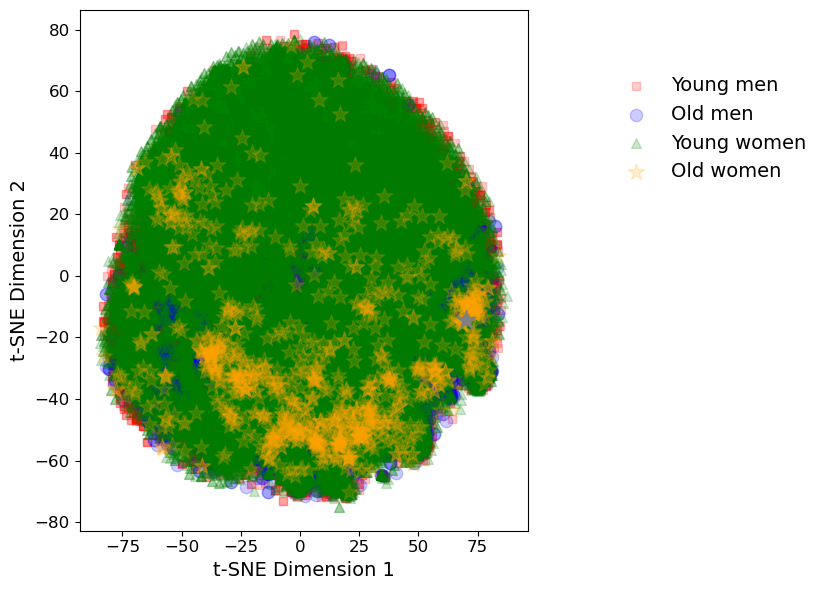

In [191]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))
# Set the background color of the plot
#fig.patch.set_facecolor('skyblue')
#ax.set_facecolor('skyblue')


# Plot each group separately with specified colors and labels
ax.scatter(young_men_2d[:, 0], young_men_2d[:, 1], color=colors[0], label=labels[0], alpha=0.2, marker='s',  s=40)
ax.scatter(old_men_2d[:, 0], old_men_2d[:, 1], color=colors[1], label=labels[1], alpha=0.2, marker='o',  s=80)
ax.scatter(young_women_2d[:, 0], young_women_2d[:, 1], color=colors[2], label=labels[2], alpha=0.2, marker='^',  s=50)
ax.scatter(old_women_2d[:, 0], old_women_2d[:, 1], color=colors[3], label=labels[3], alpha=0.2, marker='*',  s=150)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='s',  s=20)
ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='*',  s=200)
#scatter = ax.scatter(data_tsne_tensor[4060:4120, 0], data_tsne_tensor[4060:4120, 1], c=all_losses_normalized[60:120], cmap='gray_r', marker='o',  s=80)
#scatter = ax.scatter(data_tsne_tensor[4120:4180, 0], data_tsne_tensor[4120:4180, 1], c=all_losses_normalized[120:180], cmap='gray_r', marker='^',  s=50)
#scatter = ax.scatter(data_tsne_tensor[4180:, 0], data_tsne_tensor[4180:, 1], c=all_losses_normalized[180:240], cmap='gray_r', marker='*',  s=150)

#cbar = plt.colorbar(scatter)
#cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=3., frameon=False, fontsize=14)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


# Now plot with the nearest neighbours from different groups around the selected source (black) and attacked (gray) points

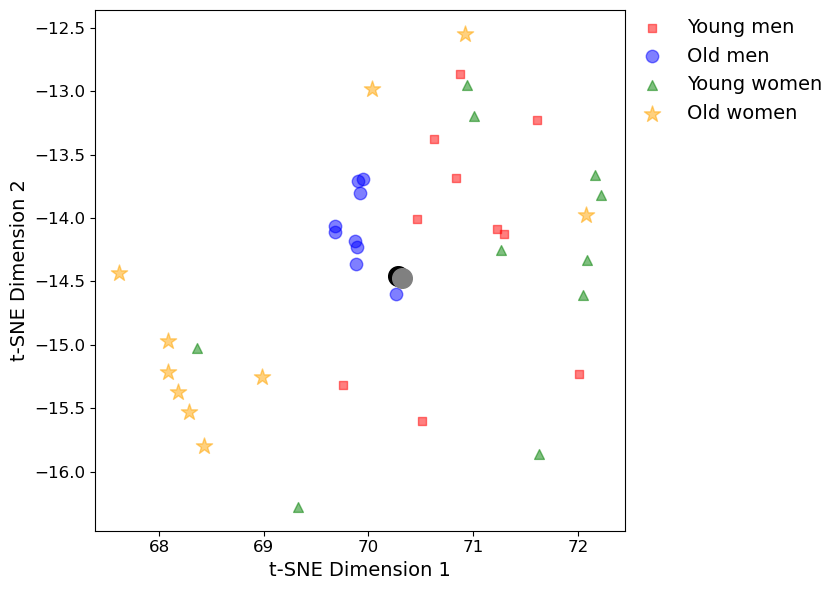

In [192]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))
# Set the background color of the plot
#fig.patch.set_facecolor('skyblue')
#ax.set_facecolor('skyblue')


# Plot each group separately with specified colors and labels
ax.scatter(young_men_2d_chosen[:, 0], young_men_2d_chosen[:, 1], color=colors[0], label=labels[0], alpha=0.5, marker='s',  s=40)
ax.scatter(old_men_2d_chosen[:, 0], old_men_2d_chosen[:, 1], color=colors[1], label=labels[1], alpha=0.5, marker='o',  s=80)
ax.scatter(young_women_2d_chosen[:, 0], young_women_2d_chosen[:, 1], color=colors[2], label=labels[2], alpha=0.5, marker='^',  s=50)
ax.scatter(old_women_2d_chosen[:, 0], old_women_2d_chosen[:, 1], color=colors[3], label=labels[3], alpha=0.5, marker='*',  s=150)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')

if(selected_group_index == 0):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='s',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='s',  s=200)
if(selected_group_index == 1):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='o',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='o',  s=200)
if(selected_group_index == 2):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='^',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='^',  s=200)
if(selected_group_index == 3):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='*',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='*',  s=200)

#cbar = plt.colorbar(scatter)
#cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1), borderaxespad=0., frameon=False, fontsize=14)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


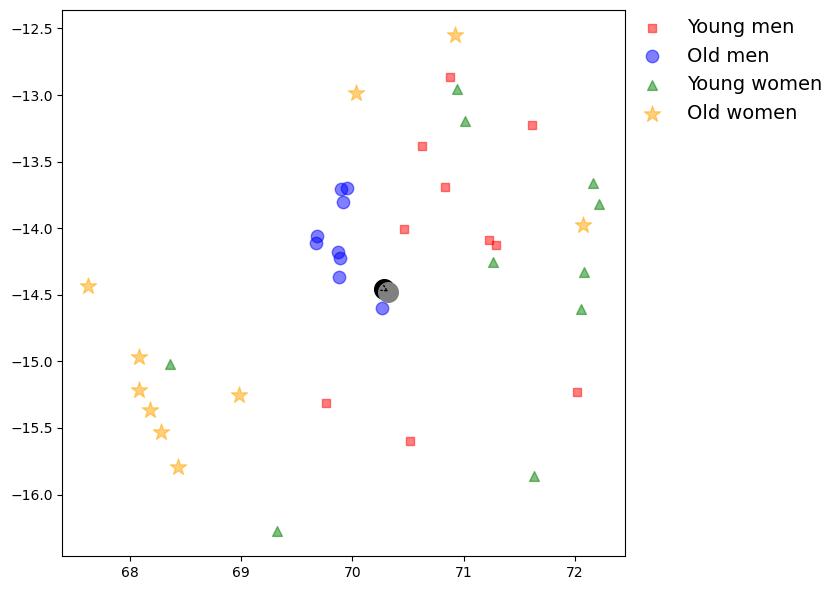

In [195]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

#data_tsne_tensor = attacked_tsne_embeds.cpu().numpy()
all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
all_losses_normalized = all_losses

fig, ax = plt.subplots(figsize=(10, 6))
# Set the background color of the plot
#fig.patch.set_facecolor('skyblue')
#ax.set_facecolor('skyblue')

# Plot each group separately with specified colors and labels
ax.scatter(young_men_2d_chosen[:, 0], young_men_2d_chosen[:, 1], color=colors[0], label=labels[0], alpha=0.5, marker='s',  s=40)
ax.scatter(old_men_2d_chosen[:, 0], old_men_2d_chosen[:, 1], color=colors[1], label=labels[1], alpha=0.5, marker='o',  s=80)
ax.scatter(young_women_2d_chosen[:, 0], young_women_2d_chosen[:, 1], color=colors[2], label=labels[2], alpha=0.5, marker='^',  s=50)
ax.scatter(old_women_2d_chosen[:, 0], old_women_2d_chosen[:, 1], color=colors[3], label=labels[3], alpha=0.5, marker='*',  s=150)

if(selected_group_index == 0):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='s',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='s',  s=200)
    for i in range(len(before_attack_2d_embed)):
        ax.annotate('', xy=(attacked_2d_embed[i, 0], attacked_2d_embed[i, 1]), 
                    xytext=(before_attack_2d_embed[i, 0], before_attack_2d_embed[i, 1]),
                    arrowprops=dict(arrowstyle="->", linestyle="dotted", color='black'))

if(selected_group_index == 1):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='o',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='o',  s=200)
    for i in range(len(before_attack_2d_embed)):
        ax.annotate('', xy=(attacked_2d_embed[i, 0], attacked_2d_embed[i, 1]), 
                    xytext=(before_attack_2d_embed[i, 0], before_attack_2d_embed[i, 1]),
                    arrowprops=dict(arrowstyle="->", linestyle="dotted", color='black'))

if(selected_group_index == 2):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='^',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='^',  s=200)
    for i in range(len(before_attack_2d_embed)):
        ax.annotate('', xy=(attacked_2d_embed[i, 0], attacked_2d_embed[i, 1]), 
                    xytext=(before_attack_2d_embed[i, 0], before_attack_2d_embed[i, 1]),
                    arrowprops=dict(arrowstyle="->", linestyle="dotted", color='black'))

if(selected_group_index == 3):
    ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color = 'black', marker='*',  s=200)
    ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color = 'gray', marker='*',  s=200)
    for i in range(len(before_attack_2d_embed)):
        ax.annotate('', xy=(attacked_2d_embed[i, 0], attacked_2d_embed[i, 1]), 
                    xytext=(before_attack_2d_embed[i, 0], before_attack_2d_embed[i, 1]),
                    arrowprops=dict(arrowstyle="->", linestyle="dotted", color='black'))

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1), borderaxespad=0., frameon=False, fontsize=14)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


# Verify plot

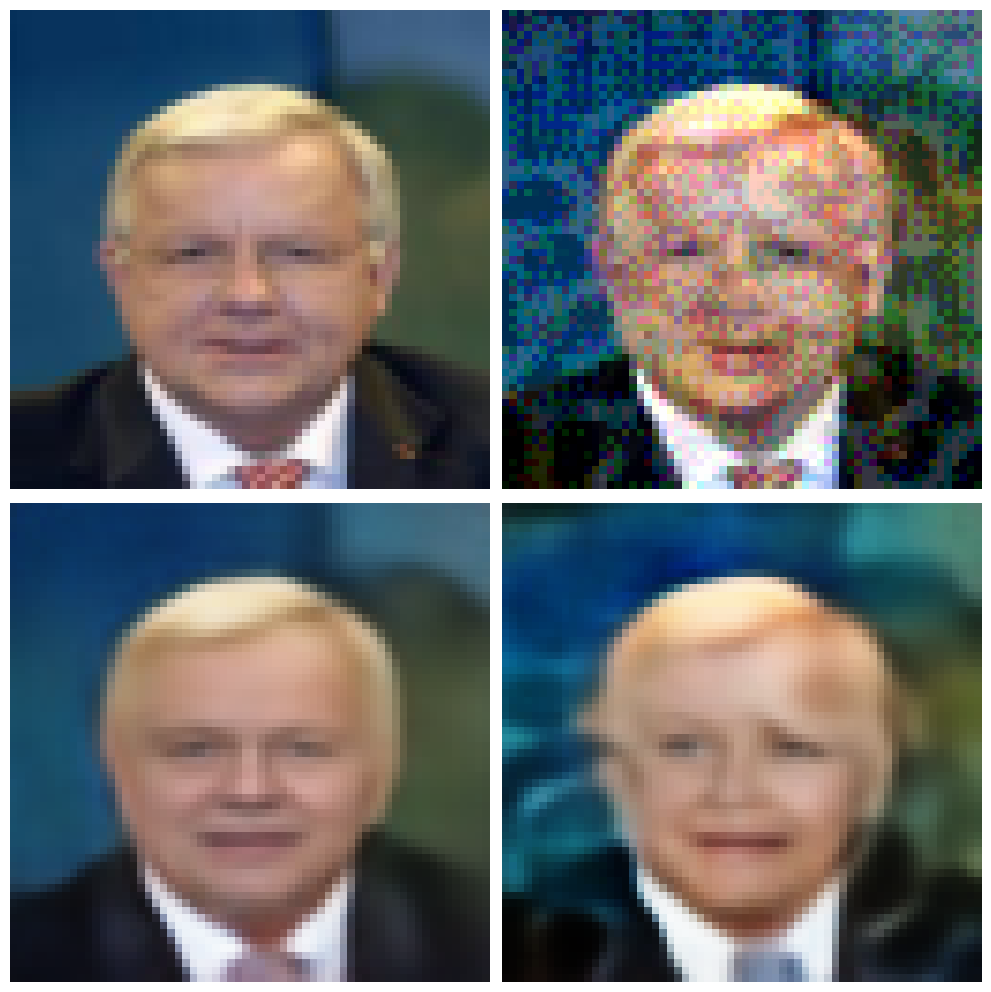

In [194]:
segment = sel_pt_in_the_group

beta_value = 5.0
#model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))

#model.eval()



desired_norm_l_inf = 0.094

#all_features = ["bald", "beard", "oldfemaleGlass", "hat"]#, "generalWhiteWomen", "blackWomen"]

universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]

all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
feature = all_features[selected_group_index]

#source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 
source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 
from vae import VAE_big
model = VAE_big(device, image_channels=3).to(device)
train_data_size = 162079
epochs = 199


if(beta_value == 5.0 or beta_value == 10.0): 
    model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
    optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"beta"+str(beta_value)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
else:
    model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
    optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
model.eval()


image_height, image_width, _ = source_im[0].cpu().detach().permute(1, 2, 0).cpu().numpy().shape
aspect_ratio = image_width / image_height

corresponding_class_polulations = [1819, 24707, 145, 2827]
#inside_feature_name = inside_feature_names[3]



actualOutput, _, _ = model(source_im)
ActualReconLoss = torch.sqrt((actualOutput - source_im)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


DivAttackeImage = source_im + optimized_noise
NormalDivAttackeImage = (DivAttackeImage - DivAttackeImage.min())/(DivAttackeImage.max() - DivAttackeImage.min())
DivOutput,_,_ = model(NormalDivAttackeImage)
DivOutputL2ActualOutput = torch.sqrt((DivOutput - actualOutput)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


all_source_images = torch.cat([source_im, NormalDivAttackeImage])
model.eval()
with torch.no_grad():
    image_recon, recon_loss, kl_losses = model(source_im)

    fig, ax = plt.subplots(2, 2, figsize=(10, 10/ aspect_ratio))
    ax[0][0].imshow(source_im[0].permute(1, 2, 0).cpu().numpy())
    #ax[0].set_title('Original Image')
    ax[0][0].axis('off')

    ax[1][0].imshow(actualOutput[0].cpu().detach().permute(1, 2, 0).cpu().numpy())
    #ax[1].set_title('Actual Reconstructed Image')
    ax[1][0].axis('off')

    ax[0][1].imshow(NormalDivAttackeImage[0].cpu().detach().permute(1, 2, 0).cpu().numpy())
    #ax[2].set_title('Adversarial Image')
    ax[0][1].axis('off')

    ax[1][1].imshow(DivOutput[0].cpu().detach().permute(1, 2, 0).cpu().numpy())
    #ax[3].set_title('Adversarial Reconstructed Image')
    ax[1][1].axis('off')
plt.tight_layout(pad=1)
#plt.savefig("/home/luser/autoencoder_attacks/a_fairness_results/qualitative_comparision/BetaVAE_qualitative_"+str(feature)+"im_no_"+str(segment)+".png")
plt.show()





# Get neighbour faces from all groups

In [176]:
young_men_neighbours = big_groups_list[0][young_men_neig_inds]
old_men_neighbours = big_groups_list[1][old_men_neig_inds]
young_women_neighbours = big_groups_list[2][young_women_neig_inds]
old_women_neighbours = big_groups_list[3][old_women_neig_inds]

In [177]:
#big_groups_list=0

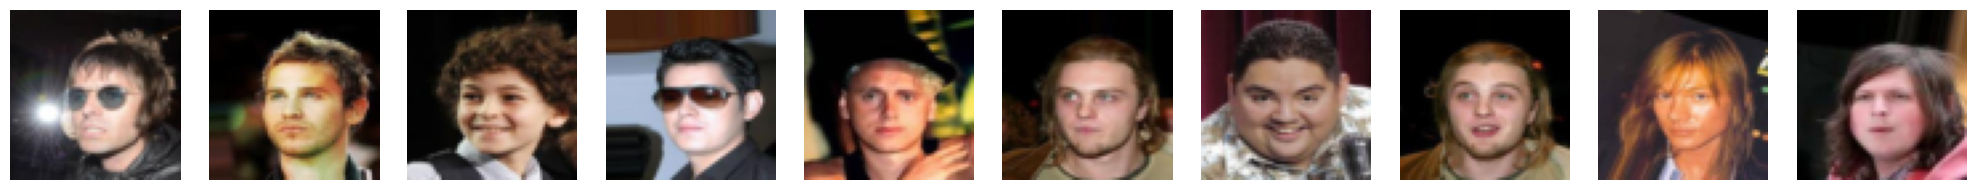

In [178]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(young_men_neighbours[i].cpu().detach().permute(1, 2, 0).cpu().numpy())
    axes[i].axis('off') 
plt.tight_layout()
plt.show()


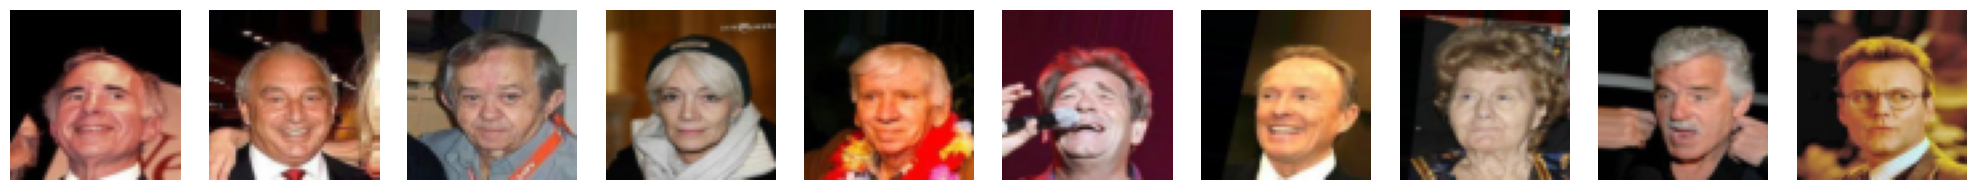

In [179]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(old_men_neighbours[i].cpu().detach().permute(1, 2, 0).cpu().numpy())
    axes[i].axis('off') 
plt.tight_layout()
plt.show()


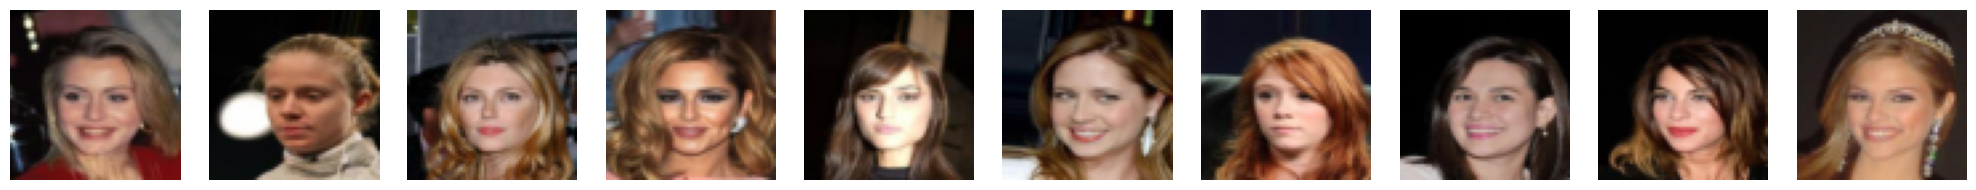

In [180]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(young_women_neighbours[i].cpu().detach().permute(1, 2, 0).cpu().numpy())
    axes[i].axis('off') 
plt.tight_layout()
plt.show()


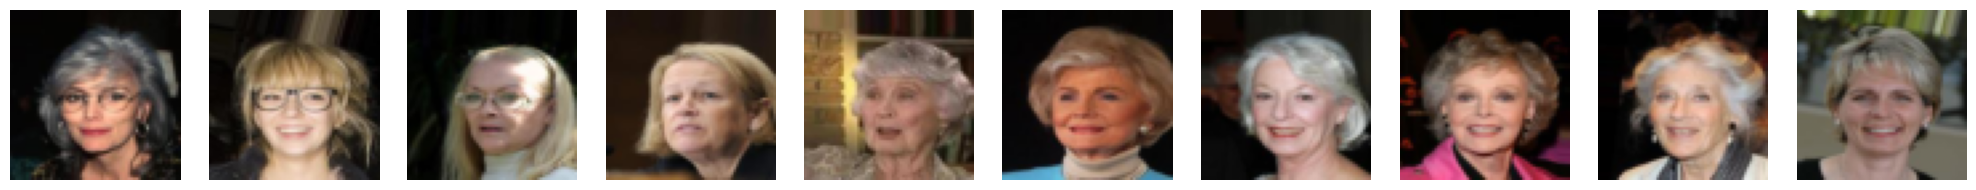

In [181]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(old_women_neighbours[i].cpu().detach().permute(1, 2, 0).cpu().numpy())
    axes[i].axis('off') 
plt.tight_layout()
plt.show()
